In [6]:
!pip install plotly

^C


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 2.4 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/19.1 MB 3.0 MB/s eta 0:00:06
   ---- ----------------------------------- 2.4/19.1 MB 3.7 MB/s eta 0:00:05
   ------ --------------------------------- 2.9/19.1 MB 3.8 MB/s eta 0:00:05
   ------- -------------------------------- 3.7/19.1 MB 3.5 MB/s eta 0:00:05
   --------- ------------------------------ 4.5/19.1 MB 3.6 MB/s eta 0:00:05
   ---------- ----------------------------- 5.0/19.1 MB 3.6 MB/s eta 0:00:04
   ------------ --------------------------- 5.8/19.1 MB 3.4 MB/s eta 0:00:04
   ------------ --------------------------- 6.0/19.1 MB 3.4 MB/s eta 0:00:04
   ------------- -------------------------- 6.6/19.1 MB 3.2 MB/s eta 0:00:04
   --------------- ------------------------ 7.3/19.1 MB 3.2 MB/s eta 0:00:04
   ---------------- ----------------------- 7.9/19.1 MB 3.1 MB/s eta 0:00:04
   ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import pi
import matplotlib.patches as mpatches

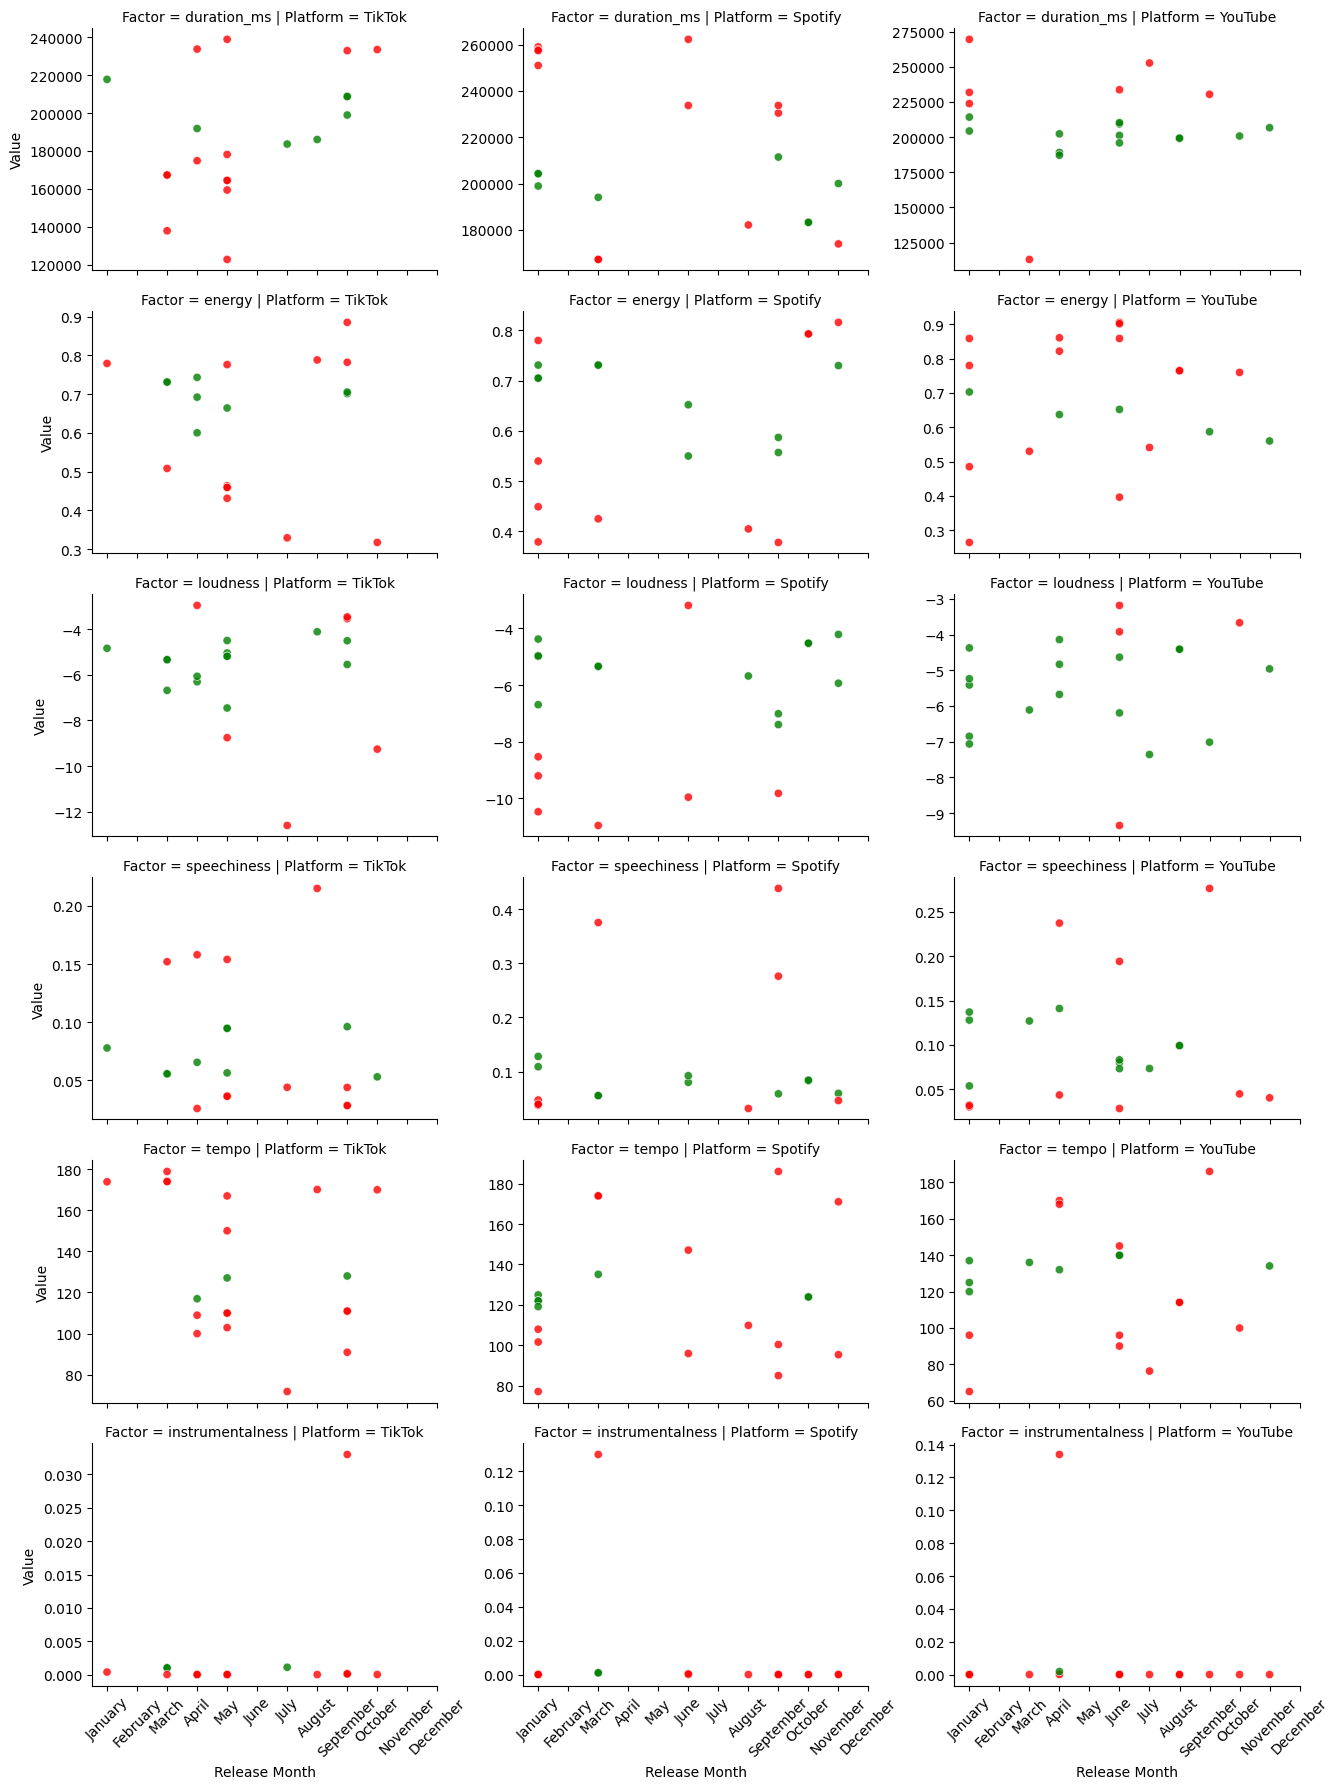

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv('../datasets/merged.csv')

# Add a 'Release Month' column to the dataset
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')
df['Release Month'] = df['Release Date'].dt.month_name()

# Get top 20 songs for each platform
df_copy = df.copy()
tiktok_top_songs = df_copy.nlargest(20, 'TikTok Views').assign(Platform='TikTok')
spotify_top_songs = df_copy.nlargest(20, 'Spotify Streams').assign(Platform='Spotify')
youtube_top_songs = df_copy.nlargest(20, 'YouTube Views').assign(Platform='YouTube')

# Combine all top 20 songs into a single DataFrame
top_20_songs = pd.concat([tiktok_top_songs, spotify_top_songs, youtube_top_songs])

# Make 'Release Month' a categorical type with the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
top_20_songs['Release Month'] = pd.Categorical(top_20_songs['Release Month'], categories=month_order, ordered=True)

# Define thresholds and margin values
thresholds = {
    'energy': 0.65,
    'instrumentalness': 0.003,
    'duration_ms': 203000,
    'tempo': 130,
    'speechiness': 0.1,
    'loudness': -5.93,
}

margin_vals = {
    'energy': 0.1,
    'instrumentalness': 0.002,
    'duration_ms': 20000,
    'tempo': 15,
    'speechiness': 0.05,
    'loudness': 2.0,
}

# Melt the DataFrame for easier plotting
melted_df = top_20_songs.melt(
    id_vars=['Release Month', 'Platform'],
    value_vars=['duration_ms', 'energy', 'loudness', 'speechiness', 'tempo', 'instrumentalness'],
    var_name='Factor',
    value_name='Value'
)

# Function to classify points based on threshold and margin
def classify_point(row):
    threshold = thresholds[row['Factor']]
    margin = margin_vals[row['Factor']]
    
    if abs(row['Value'] - threshold) <= margin:
        return 'green'  # Within margin
    else:
        return 'red'  # Outside margin

# Apply the classification function to each row
melted_df['Point Color'] = melted_df.apply(classify_point, axis=1)

# Convert 'Point Color' to a categorical type for proper handling in seaborn
melted_df['Point Color'] = pd.Categorical(melted_df['Point Color'])

# Create a FacetGrid for the scatter plots
g = sns.FacetGrid(melted_df, row='Factor', col='Platform', height=3, aspect=1.5, sharey=False)

# Explicitly pass the melted_df to sns.scatterplot using the data argument
g.map(sns.scatterplot, 'Release Month', 'Value', alpha=0.8, hue='Point Color', palette={'green': 'green', 'red': 'red'}, data=melted_df)

# Ensure all 12 months are displayed on the x-axis
for ax in g.axes.flat:
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_order, rotation=45)

# Adjust layout for better spacing
g.fig.tight_layout()

# Save and show the plot
plt.savefig('../images/loop_3/release_month_vs_factors_facetgrid_colored.png', dpi=300)
plt.show()
